In [1]:
import pandas as pd
from exp_data_analysis import ExpDataAnalysis

In [2]:
df = pd.read_csv("laptop_price.csv", encoding='latin1')

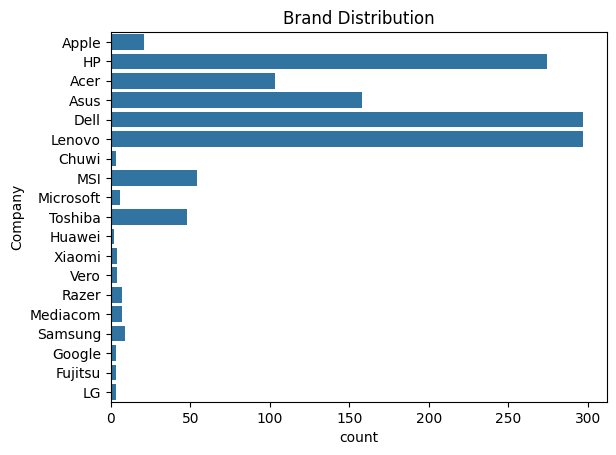

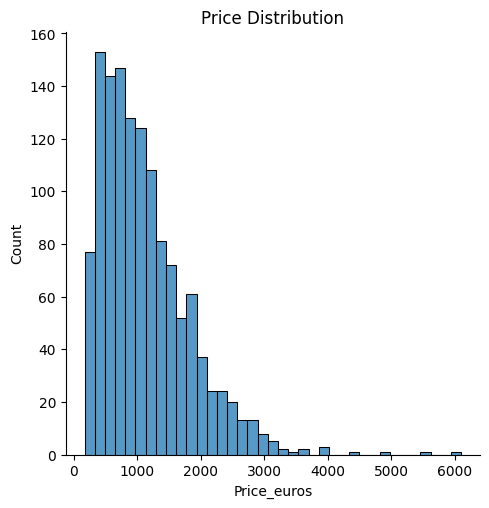

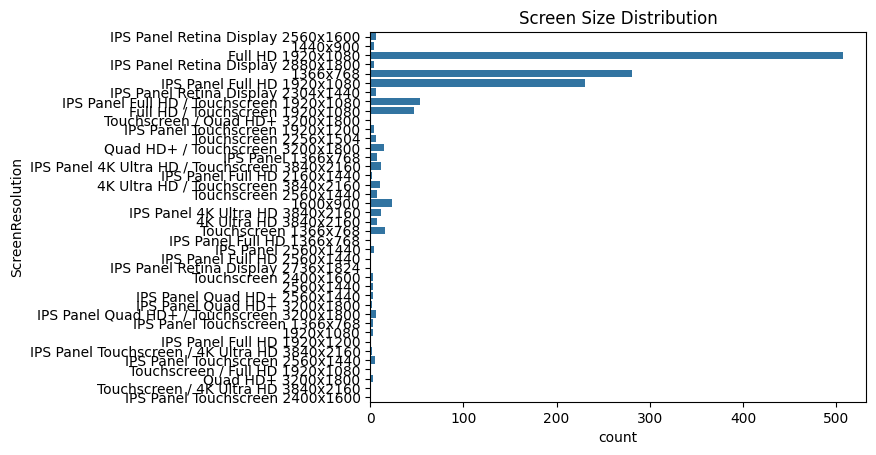

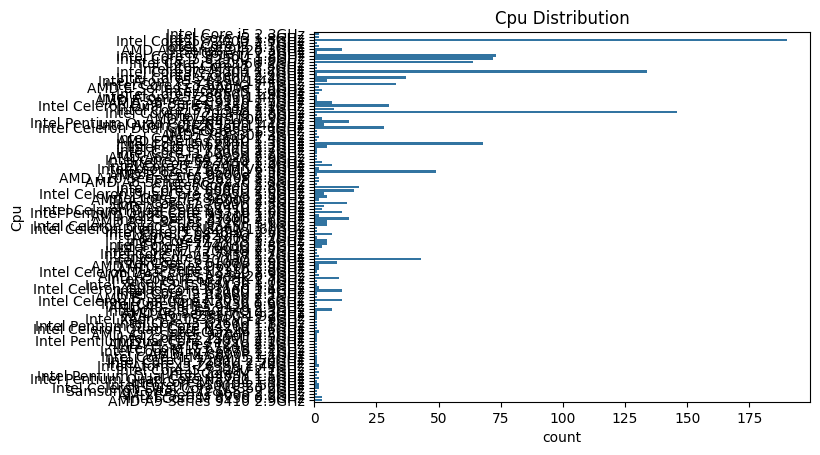

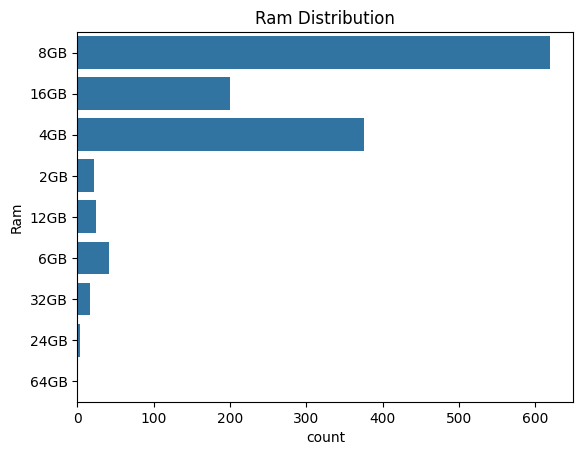

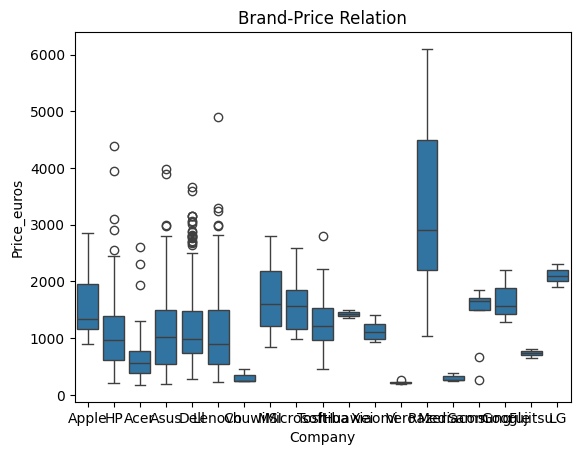

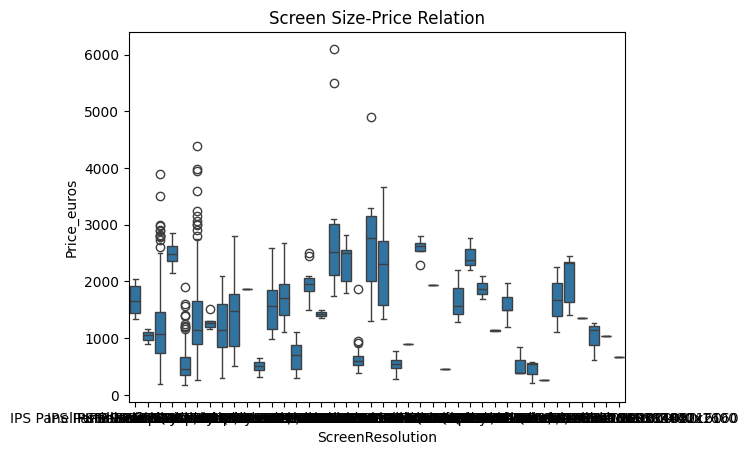

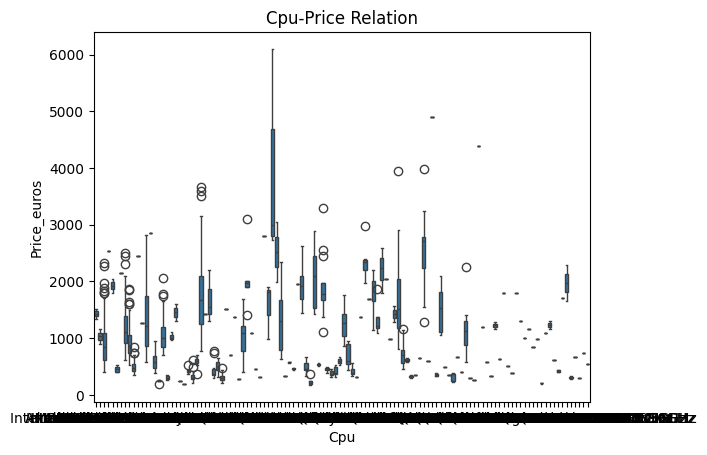

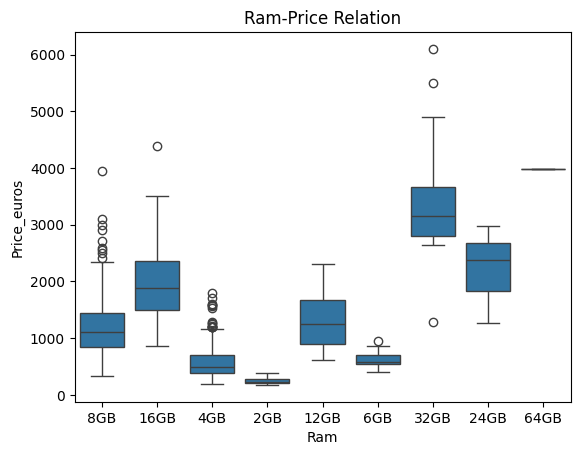

ValueError: could not convert string to float: 'Apple'

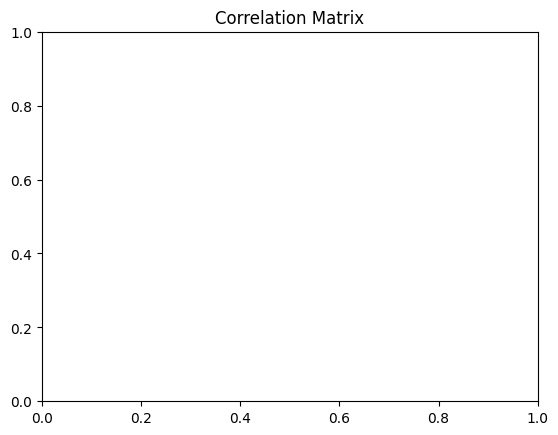

In [3]:
expData = ExpDataAnalysis(df)
expData.getMissingValues()
expData.getBrandDistribution()
expData.getPriceDistribution()
expData.getScreenSizeDistribution()
expData.getCpuDistribution()
expData.getRamDistribution()
expData.getCompanyPriceRelation()
expData.getScreenSizePriceRelation()
expData.getCpuPriceRelation()
expData.getRamPriceRelation()
expData.getCorrelationMatrix()
expData.getStatInsights()